In [17]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [18]:
from sklearn import datasets

iris = datasets.load_iris()

In [19]:
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')

iris['species'] = species

In [20]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [21]:
size = len(iris)
test_size = 0.3

In [22]:
iris_test = iris.sample(frac=0.3,random_state=5)
len(iris_test)

45

In [23]:
test = iris_test.drop(['target','species'],axis=1)
test_labels = iris_test.loc[:,['species']]
test_labels.head()

,species
82,versicolor
134,virginica
114,virginica
42,setosa
109,virginica


In [24]:
iris= iris.drop(iris_test.index)
train = iris.drop(['target','species'],axis=1)
train_labels = iris.loc[:,['species']]
train_labels.head()

,species
0,setosa
2,setosa
3,setosa
4,setosa
5,setosa


In [25]:
def euclidian(x,y):
    return math.sqrt(np.sum((x-y)**2))

In [26]:
def predict(list1, list2, k):
    zipped_pairs = zip(list2, list1)
    # print(zipped_pairs)
    z = [x for _, x in sorted(zipped_pairs)]
    # print(z)
    dic = {}
    for i in range(k):
        if z[i] in dic.keys():
            dic[z[i]]+=1
        else:
            dic[z[i]]=1
    # print(dic)
    cl = max(zip(dic.values(), dic.keys()))[1]
    return cl

In [27]:
def knn(train,train_labels,test,k):
    output_labels = []
    for i in test:
        lis = []
        lab = train_labels['species'].to_list()
        for j in train:
            lis.append(euclidian(i,j))
        # print(len(lis),type(lab))
        output_labels.append(predict(lab,lis,k))
    return output_labels

In [28]:
train = train.to_numpy()
test = test.to_numpy()
out = knn(train,train_labels,test,5)

In [29]:
## compare with original list
org_list = test_labels['species'].to_list()
# print(len(org_list))
c=0
## setosa
for i in range(len(out)):
    if out[i]==org_list[i]:
        c+=1
acc = c/len(out)      
print('accuracy:',acc)

accuracy: 0.9555555555555556


In [30]:
### actual values
sc = org_list.count('setosa')
vec = org_list.count('versicolor')
vic = org_list.count('virginica')
sc,vec,vic

(15, 16, 14)

In [31]:
a11,a12,a13=0,0,0
a21,a22,a23=0,0,0
a31,a32,a33=0,0,0
for i in range(len(out)):
    if out[i]==org_list[i]:
        if out[i] == 'setosa':
            a11+=1
        elif out[i] == 'versicolor':
            a22+=1
        else:
            a33+=1
    else:
        if out[i]=='setosa':
            if org_list[i]=='versicolor':
                a21+=1
            else:
                a31+=1
        if out[i]=='versicolor':
            if org_list[i]=='setosa':
                a12+=1
            else:
                a32+=1
        if out[i]=='virginica':
            if org_list[i]=='setosa':
                a13+=1
            else:
                a23+=1
arr = [[a11,a12,a13],[a21,a22,a23],[a31,a32,a33]]
arr = np.array(arr)
print(arr)

[[15  0  0]
 [ 0 14  2]
 [ 0  0 14]]


In [33]:
acc_list = []
for k in range(1,21):
    out = knn(train,train_labels,test,k)
    c=0
    for i in range(len(out)):
        if out[i]==org_list[i]:
            c+=1
    acc = c/len(out)
    acc_list.append(acc)

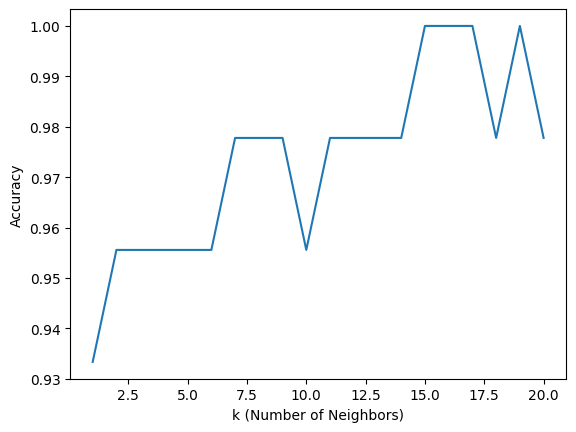

In [34]:
x=[x for x in range(1,21)]
plt.plot(x, acc_list)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()